# Задание 1

## Сделать POST запрос при помощи Python с модулем requests
### Здесь вам нужно выбрать один из понравившихся методов из списка и попробовать реализовать его: 
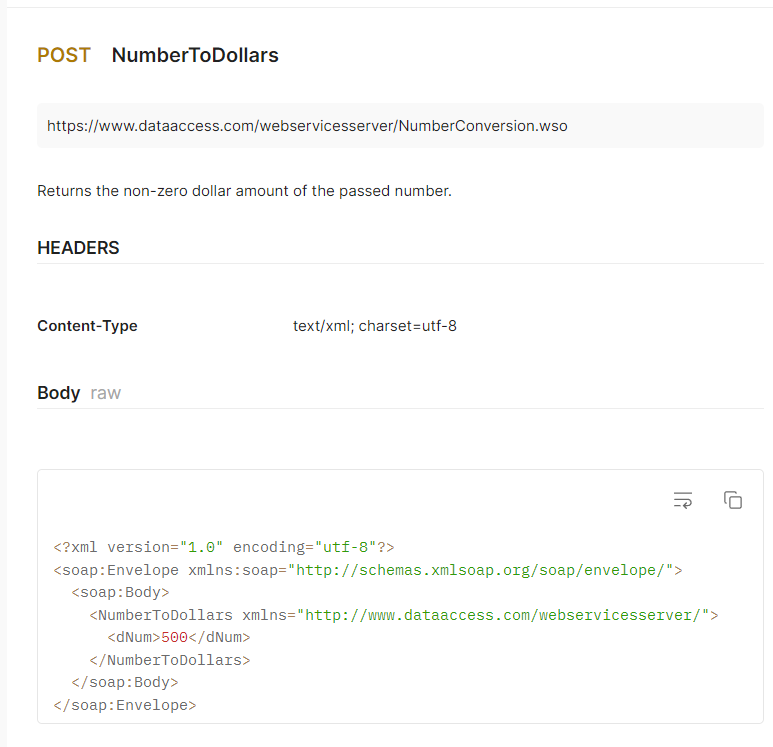

In [1]:
import requests
# SOAP URL
url = "https://www.dataaccess.com/webservicesserver/NumberConversion.wso"
 
# structured XML
payload = """<?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <NumberToDollars xmlns="http://www.dataaccess.com/webservicesserver/">
      <dNum>500</dNum>
    </NumberToDollars>
  </soap:Body>
</soap:Envelope>"""
# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}
# POST запрос
response = requests.request("POST", url, headers=headers, data=payload)
 
# ответ
print(response.text)
print(response)

<?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <m:NumberToDollarsResponse xmlns:m="http://www.dataaccess.com/webservicesserver/">
      <m:NumberToDollarsResult>five hundred dollars</m:NumberToDollarsResult>
    </m:NumberToDollarsResponse>
  </soap:Body>
</soap:Envelope>
<Response [200]>


# Задание 2

1) Задайте WSDL URL. В примере я буду использовать
http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso?WSDL 
http://webservices.oorsprong.org/websamples.countryinfo/CountryIntPhoneCode
http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso
Если вы попробуйте URL выше, то вы можете столкнуться с ошибкой. Для получения правильного WSDL URL можно, просто посетив базовый URL и взять там нужный Service Description. Ошибка сделана специально, чтобы вы попробовали посмотреть документацию сервиса из примера, если вы будете пользоваться приведённым ниже кодом. Выясните, какая из ссылок не работает и почему. Разберитесь в документации и найдите там подходящий метод. Вероятно это что-то с названием …PhoneCode…. Найдите нужные WSDL URL. В качестве базового URL будет использоваться service_url, а после базового URL добавьте имя сервиса.
2) Далее необходимо создать элемент заголовка и установить в элемент заголовка method_url и service_url.
3) Инициализируйте zeep с WSDL URL.
4) Вызовите сервис zeep с именем сервиса. 
В примере ниже имя сервиса - CountryIntPhoneCode. Необходимо передать параметры с country_code, а также передать заголовок в _soapheaders в виде списка.
5) Получите телефонный код страны


In [1]:
import zeep
import requests

wsdl_url = 'http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso?WSDL'
response = requests.get(wsdl_url)
print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<definitions xmlns="http://schemas.xmlsoap.org/wsdl/" xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:soap="http://schemas.xmlsoap.org/wsdl/soap/" xmlns:soap12="http://schemas.xmlsoap.org/wsdl/soap12/" xmlns:tns="http://www.oorsprong.org/websamples.countryinfo" name="CountryInfoService" targetNamespace="http://www.oorsprong.org/websamples.countryinfo">
  <types>
    <xs:schema elementFormDefault="qualified" targetNamespace="http://www.oorsprong.org/websamples.countryinfo">
      <xs:complexType name="tContinent">
        <xs:sequence>
          <xs:element name="sCode" type="xs:string"/>
          <xs:element name="sName" type="xs:string"/>
        </xs:sequence>
      </xs:complexType>
      <xs:complexType name="tCurrency">
        <xs:sequence>
          <xs:element name="sISOCode" type="xs:string"/>
          <xs:element name="sName" type="xs:string"/>
        </xs:sequence>
      </xs:complexType>
      <xs:complexType name="tCountryCodeAnd

In [2]:
from zeep import Client

wsdl_url = 'http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso?WSDL'

method_url = 'http://webservices.oorsprong.org/websamples.countryinfo/CapitalCity'

service_url = 'http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso'

client = Client(wsdl=wsdl_url)

header = zeep.xsd.Element(
    "Header",
    zeep.xsd.ComplexType(
        [
            zeep.xsd.Element(
                "{http://www.w3.org/2005/08/addressing}Action", zeep.xsd.String()
            ),
            zeep.xsd.Element(
                "{http://www.w3.org/2005/08/addressing}To", zeep.xsd.String()
            ),
        ]
    ),
)

header_value = header(Action=method_url, To=service_url)


In [4]:
print("Capital of Russia is", client.service.CapitalCity(sCountryISOCode='RU',
                                 _soapheaders=[header_value])
)

print("Capital of Sweden is", client.service.CapitalCity(sCountryISOCode='SE',
                                 _soapheaders=[header_value])
)

print("Capital of China is", client.service.CapitalCity(sCountryISOCode='CN',
                                 _soapheaders=[header_value])
)

Capital of Russia is Moscow
Capital of Sweden is Stockholm
Capital of China is Beijing
